In [18]:
# Example texts (replace with your actual content)
webpage_1 = "This is the content of webpage 1. It has some unique text."
webpages = [
    "Content of webpage 2. This is different from webpage 1.",
    "Webpage 3 contains unique and interesting information.",
    "This is the content of webpage 1. It has some unique text",
    "Webpage 5 discusses similar topics but has different wording.",
    "The content of webpage 6 is completely unique and unrelated.",
    "Webpage 7 provides additional insights into topics mentioned in webpage 1.",
    "Content from webpage 8 includes references to webpage 1 and 3.",
    "Webpage 9 explores entirely new ideas not found in others.",
    "Webpage 1 has some unique texts."
]

Similarity scores between Webpage 1 and others:
     Webpage  Similarity Score
0  Webpage 1          0.461092
1  Webpage 2          0.106131
2  Webpage 3          1.000000
3  Webpage 4          0.102013
4  Webpage 5          0.450679
5  Webpage 6          0.045087
6  Webpage 7          0.120004
7  Webpage 8          0.021263
8  Webpage 9          0.409775
Average Similarity Score: 0.3018
It is likely to be a fake news


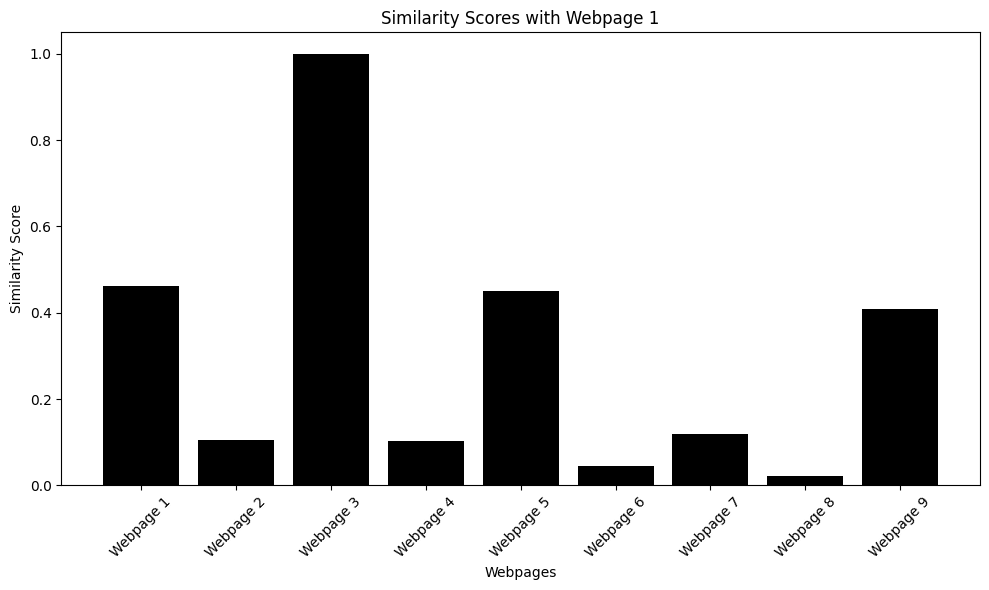

In [19]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity


# Combine webpage 1 with others for comparison
all_webpages = [webpage_1] + webpages

# Vectorize the texts using TF-IDF
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(all_webpages)

# Compute cosine similarity between the first webpage and others
similarity_scores = cosine_similarity(tfidf_matrix[0:1], tfidf_matrix[1:]).flatten()

# Display similarity scores
results = pd.DataFrame({
    "Webpage": [f"Webpage {i+1}" for i in range(len(webpages))],
    "Similarity Score": similarity_scores
})

# Sort by webpage
results = results.sort_values(by="Webpage", ascending=True)

print("Similarity scores between Webpage 1 and others:")
print(results)

# Calculate average similarity score
average_score = similarity_scores.mean()
print(f"Average Similarity Score: {average_score:.4f}")
if average_score<0.5:
    print("It is likely to be a fake news")
else:
    print("It is likely to be a real news")


# Save results to a CSV file
results.to_csv("similarity_scores.csv", index=False)

# Example plot for visualization (optional)
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(results["Webpage"], results["Similarity Score"], color="black")
plt.title("Similarity Scores with Webpage 1")
plt.xlabel("Webpages")
plt.ylabel("Similarity Score")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
